### Install Libraries

In [1]:
#%pip install yfinance

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

### Load Headlines data

In [3]:
# Load the CSV file from the local folder
headlines_df = pd.read_csv('../data/combined_headlines_new.csv')

# Check null values in dataset
print(headlines_df.isnull().sum())

# Rename column names to avoid issues in merging and filtering
headlines_df.columns = ['Date', 'Headlines']

# Convert 'Date' column to datetime type 
headlines_df['Date'] = pd.to_datetime(headlines_df['Date'],errors='coerce')

date         0
headlines    0
dtype: int64


In [4]:
headlines_df.head()

,Date,Headlines
0,2020-07-17,Jim Cramer : A better way to invest in the Cov...
1,2020-07-17,Cramer's lightning round : I would own Teradyne
2,2020-07-17,"Cramer's week ahead : Big week for earnings , ..."
3,2020-07-17,IQ Capital CEO Keith Bliss says tech and healt...
4,2020-07-16,Wall Street delivered the 'kind of pullback I'...


In [5]:
# Sort the dataset on Date column and reset the index to avoid any new column
headlines_df.sort_values(by='Date', inplace=True)
headlines_df = headlines_df.reset_index(drop=True)

# Calculate min and max date of Date column 
min_date = headlines_df['Date'].min().date()
max_date = headlines_df['Date'].max().date() + pd.Timedelta(days=7)

print(min_date, max_date)

2017-12-17 2020-07-25


### Load SPY data

In [6]:
# Load SPY historical data from yfinace using date range of headlines dataset
sp500_df = yf.Ticker("SPY").history(start= min_date, end= max_date)
sp500_df.reset_index(inplace=True)

# Convert Date column  to datetime and normalize dates to remove time part
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'], errors='coerce')
sp500_df['Date'] = sp500_df['Date'].dt.normalize()

# Ensure there are no time zones
sp500_df['Date'] = sp500_df['Date'].dt.tz_localize(None)



In [7]:
sp500_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2017-12-18,240.938034,241.387378,240.830196,241.027908,83653600,0.0,0.0,0.0
1,2017-12-19,241.279512,241.324435,240.030324,240.102234,82382900,0.0,0.0,0.0
2,2017-12-20,241.090788,241.144707,239.670875,239.976425,76751500,0.0,0.0,0.0
3,2017-12-21,240.614542,241.198711,240.219118,240.470749,67032300,0.0,0.0,0.0
4,2017-12-22,240.488670,240.524625,239.859578,240.407791,78720900,0.0,0.0,0.0


### Create Label column on sp500 dataframe

In [8]:
# Calculate the diffence in the open and closing stock price for given day and add this value to a new column Variation in SPY dataset
sp500_df['Variation'] = sp500_df['Close'].diff()

# Create a feature label based on the diffenrent values of Variation column. 
      # Values : Increase for > 0, Decrease for <0 and No Change for =0
sp500_df['Label'] = np.where(sp500_df['Variation'] > 0, 'Increase', np.where(sp500_df['Variation'] < 0, 'Decrease', 'No Change'))

In [9]:
sp500_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Variation,Label
0,2017-12-18,240.938034,241.387378,240.830196,241.027908,83653600,0.0,0.0,0.0,NaN,No Change
1,2017-12-19,241.279512,241.324435,240.030324,240.102234,82382900,0.0,0.0,0.0,-0.925674,Decrease
2,2017-12-20,241.090788,241.144707,239.670875,239.976425,76751500,0.0,0.0,0.0,-0.125809,Decrease
3,2017-12-21,240.614542,241.198711,240.219118,240.470749,67032300,0.0,0.0,0.0,0.494324,Increase
4,2017-12-22,240.488670,240.524625,239.859578,240.407791,78720900,0.0,0.0,0.0,-0.062958,Decrease


### Final dataset

In [10]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           654 non-null    datetime64[ns]
 1   Open           654 non-null    float64       
 2   High           654 non-null    float64       
 3   Low            654 non-null    float64       
 4   Close          654 non-null    float64       
 5   Volume         654 non-null    int64         
 6   Dividends      654 non-null    float64       
 7   Stock Splits   654 non-null    float64       
 8   Capital Gains  654 non-null    float64       
 9   Variation      653 non-null    float64       
 10  Label          654 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 56.3+ KB


In [11]:
# Merge both datasets
merged_df = pd.merge(headlines_df, sp500_df, on='Date', how='inner')

In [12]:
# Print merged data
print(merged_df)

            Date                                          Headlines  \
0     2017-12-18  Universal basic income is no panacea for us – ...   
1     2017-12-18  Brexit will usher in a dark chapter for new Br...   
2     2017-12-18  Adani scraps USD 2bn deal to outsource Carmich...   
3     2017-12-18  Ryanair pilots suspend one-day strike in week ...   
4     2017-12-18            Curbs on capitalism in the 21st century   
...          ...                                                ...   
47260 2020-07-17  BA begins to carry out its 'fire and rehire' t...   
47261 2020-07-17  I flew the jumbo for 10 years and never got ov...   
47262 2020-07-17  Business live Markets hope for progress over E...   
47263 2020-07-17  Silicon Valley has deep pockets for African st...   
47264 2020-07-17  On eve of bankruptcy , U . S . firms shower ex...   

             Open        High         Low       Close    Volume  Dividends  \
0      240.938034  241.387378  240.830196  241.027908  83653600      

### Visual Inspection

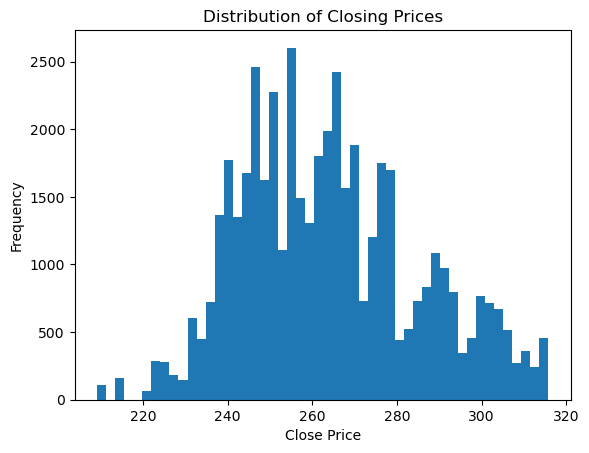

In [26]:
# Plot histogram of closing prices to visually inspect the distribution and identify any unusual spikes or gaps.
plt.hist(merged_df['Close'], bins=50)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

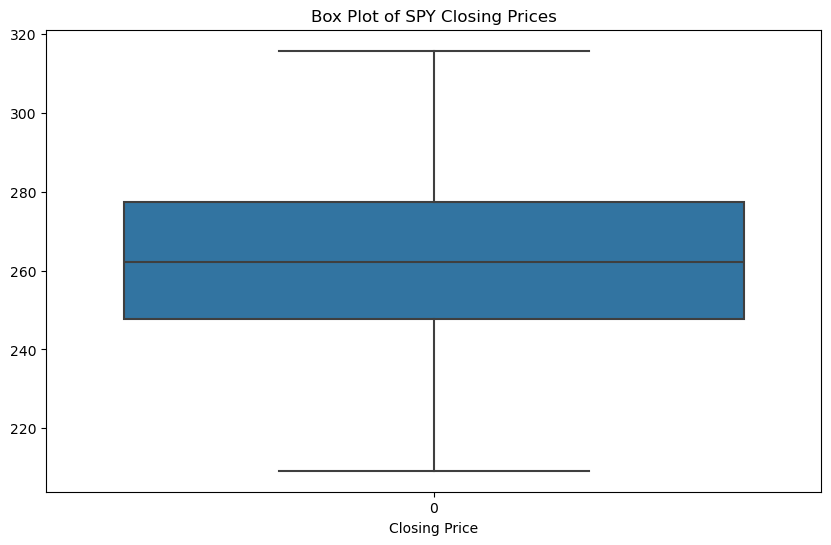

In [18]:
# Plot box plot of closing prices to identify outliers by visualizing the distribution and the spread of the data.
plt.figure(figsize=(10, 6))
sns.boxplot(merged_df['Close'])
plt.title('Box Plot of SPY Closing Prices')
plt.xlabel('Closing Price')
plt.show()

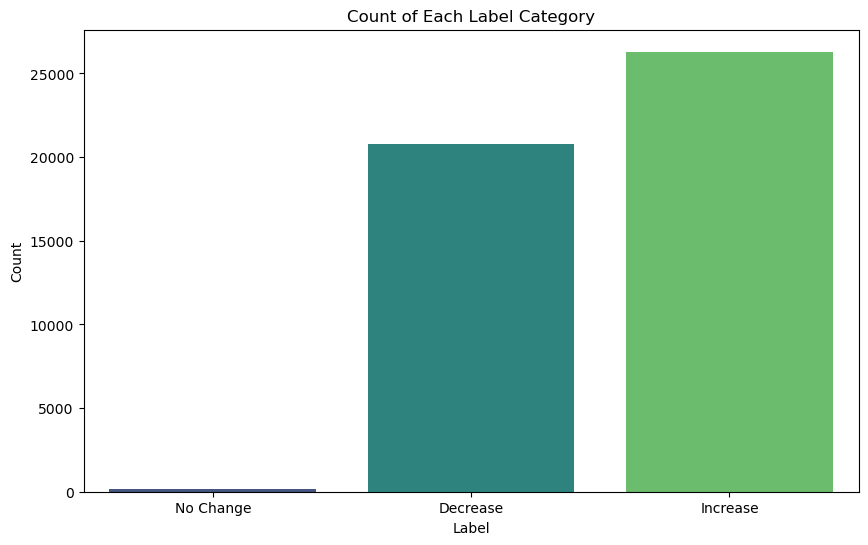

In [23]:
# Bar plot to show the count of lable column
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=merged_df, palette='viridis')
plt.title('Count of Each Label Category')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()